In [1]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

from matplotlib.colors import LogNorm

from glob import glob
import os, sys, pickle, requests

sys.path.append('../ChemMapping/scripts')
import RDAT_utils as utils
import plot_utils as eb_plot

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load in data
data300 = pd.read_json('../ExternalDatasets/data/datasets_with_predictions/out300_full_output_22May2020.json.zip')
data600 = pd.read_json('../ExternalDatasets/data/datasets_with_predictions/out600_full_output_22May2020.json.zip')
data900 = pd.read_json('../ExternalDatasets/data/datasets_with_predictions/out900_full_output_22May2020.json.zip')

In [3]:
def write_correlation_data(data):
    
    data['info'].replace('Mauger,2019 U.*nLUC mRNA','Mauger,2019 nLUC mRNA',inplace=True,regex=True)
    data['info'].replace('Mauger,2019 moU.*nLUC mRNA','Mauger,2019 moU-nLUC mRNA',inplace=True,regex=True)
    data['info'].replace('Mauger,2019 mpU.*nLUC mRNA','Mauger,2019 mpU-nLUC mRNA',inplace=True,regex=True)
    data['info'].replace('Simon,2019 Ecoli invitro .*','Simon,2019 Ecoli invitro',inplace=True,regex=True)
    data['info'].replace('Simon,2019 Ecoli exvivo .*','Simon,2019 Ecoli exvivo',inplace=True,regex=True)
    data['info'].replace('Simon,2019 Invitro .*','Simon,2019 Influenza invitro',inplace=True,regex=True)
    data['info'].replace('Simon,2019 Invivo .*','Simon,2019 Influenza invivo',inplace=True,regex=True)
    
    data.loc[data['ID']=='SINV','info'] = 'Kutchko,2018 SINV SHAPE(1M7) SSII-Mn(2+) Mut.'
    data.loc[data['ID']=='VEEV','info'] = 'Kutchko,2018 VEEV SHAPE(1M7) SSII-Mn(2+) Mut.'
    

    data.replace('T','U',inplace=True)
    correlation_data = pd.DataFrame()
    pval_data = pd.DataFrame()

    for dataset in data['info'].unique():

        print('Analyzing %s' % dataset)
        tmp_data = data.loc[data['info']==dataset]
        tmp_concat_data = utils.write_concatenated_dataframe(tmp_data)
        tmp_concat_data.replace('T','U',inplace=True)

        # filter reactivity outliers
        tmp_concat_data = utils.filter_data(tmp_concat_data,upper=98)

        # remove nucleotides preceded by 6 (or more) A's

        tmp_concat_data = tmp_concat_data.loc[tmp_concat_data['in_polyA']==0]
        tmp_concat_data = tmp_concat_data.reset_index()

        corr_data, pvals = utils.get_correlations(tmp_concat_data, split_by_nucleotides=False, n_bootstraps=200)
        corr_data['info'] = dataset
        corr_data['dataset_n_nucleotides'] = len(tmp_concat_data)
        corr_data['dataset_n_constructs'] = len(data.loc[data['info']==dataset])
        #corr_data['mean_signal_to_noise'] = np.mean(tmp_concat_data['signal_to_noise'])
        corr_data['reactivity_mean'] = np.mean(tmp_concat_data['reactivity'])
        corr_data['reactivity_std'] = np.std(tmp_concat_data['reactivity'])
        corr_data['reactivity_95perc'] = np.percentile(tmp_concat_data['reactivity'],95)
        pvals.update({'dataset': dataset})

        pval_data = pval_data.append(pvals, ignore_index=True)

        correlation_data = correlation_data.append(corr_data,ignore_index=True)
    return correlation_data, pval_data

In [5]:
corr300, pval300 = write_correlation_data(data300)
corr600, pval600 = write_correlation_data(data600)
corr900, pval900 = write_correlation_data(data900)


Analyzing Mauger,2019 nLUC mRNA


../ChemMapping/scripts/RDAT_utils.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trimmed_sequence'] = df.apply(lambda row: [list(row['sequence'])[x] for x in row['seqpos'] if x < len(row['sequence'])], axis=1)
../ChemMapping/scripts/RDAT_utils.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_polyA'] = df.apply(lambda row: get_polyA_indicator(row, polyA_len=6), axis=1)
../ChemMapping/scripts/RDAT_utils.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

n_constructs 273
13241 of 76635 nucleotides removed, 0.17, cutoff = 1.73
Analyzing Mauger,2019 mpU-nLUC mRNA
n_constructs 273
13382 of 76635 nucleotides removed, 0.17, cutoff = 1.86
Analyzing Mauger,2019 moU-nLUC mRNA
n_constructs 273
10664 of 76635 nucleotides removed, 0.14, cutoff = 1.69
Analyzing Watts,2009 HIV-1 SHAPE(NMIA) SSIII CE
n_constructs 34
660 of 9996 nucleotides removed, 0.07, cutoff = 1.24
Analyzing Siegfried,2014 HIV-1 SHAPE(1M7) SSII-Mn(2+) Mut. from Lavender
n_constructs 34
879 of 9998 nucleotides removed, 0.09, cutoff = 1.93
Analyzing Siegfried,2014 HIV-1 SHAPE(1M7) SSII-Mn(2+) Mut.
n_constructs 34
1298 of 9998 nucleotides removed, 0.13, cutoff = 2.07
Analyzing Lavender,2015 SIV mac SHAPE(1M7) SSII-Mn(2+) Mut.
n_constructs 36
1987 of 10519 nucleotides removed, 0.19, cutoff = 2.42
Analyzing Lavender,2015 SIV cpz SHAPE(1M7) SSII-Mn(2+) Mut.
n_constructs 34
1228 of 9992 nucleotides removed, 0.12, cutoff = 1.89
Analyzing Watters,2018 CMV SHAPE-seq
n_constructs 9
1032 of 

In [6]:
plotting_names = {
                  'Watts,2009 HIV-1 SHAPE(NMIA) SSIII CE': 'Watts, HIV-1, SHAPE-CE, 2009',
'Siegfried,2014 HIV-1 SHAPE(1M7) SSII-Mn(2+) Mut. from Lavender': 'Siegfried, HIV-1 Mut, SHAPE, 2014',
'Siegfried,2014 HIV-1 SHAPE(1M7) SSII-Mn(2+) Mut.': 'Siegfried, HIV-1, SHAPE, 2014',
'Lavender,2015 SIV mac SHAPE(1M7) SSII-Mn(2+) Mut.': 'Lavender, SIV mac, SHAPE-MaP, 2015',
'Lavender,2015 SIV cpz SHAPE(1M7) SSII-Mn(2+) Mut.': 'Lavender, SIV cpz, SHAPE-MaP, 2015',
'Watters,2018 CMV SHAPE-seq': 'Watters, CMV, SHAPE-MaP, 2018',
'Rice,2014 structured RNAs SHAPE(1M6) CE':'Rice, Structured RNAs SHAPE(1M6) CE, 2014',
'Rice,2014 structured RNAs SHAPE(1M7) CE':'Rice, Structured RNAs SHAPE(1M7) CE, 2014',
'Rice,2014 structured RNAs SHAPE(NMIA) CE':'Rice, Structured RNAs SHAPE(NMIA) CE, 2014',
'Kutchko,2018 SINV SHAPE(1M7) SSII-Mn(2+) Mut.': 'Kutchko, SINV, SHAPE-MaP, 2018',
'Kutchko,2018 VEEV SHAPE(1M7) SSII-Mn(2+) Mut.': 'Kutchko, VEEV, SHAPE-MaP, 2018',
'Dadonaite,2019 Influenza genome SHAPE(1M7) SSII-Mn(2+) Mut.': 'Dadonaite, Influenza A, SHAPE-MaP, 2019',
'Simon,2019 Ecoli invitro': 'Simon, E. coli rRNA in vitro, DMS-MaP-Seq, 2019',
'Simon,2019 Ecoli exvivo': 'Simon, E. coli rRNA ex vivo, DMS-MaP-Seq, 2019',
'Simon,2019 Influenza invivo':'Simon, Influenza A in vivo, DMS-MaP-Seq, 2019',
'Simon,2019 Influenza invitro':'Simon, Influenza A in vitro, DMS-MaP-Seq, 2019',
'Mauger,2019 nLUC mRNA':'Mauger, Luc mRNA, SHAPE, 2019',
'Mauger,2019 moU-nLUC mRNA':'Mauger, Luc mRNA (moU), SHAPE, 2019',
'Mauger,2019 mpU-nLUC mRNA':'Mauger, Luc mRNA (mpU), SHAPE, 2019'}

corr300['plot_name'] = [plotting_names[x] for x in corr300['info']]
corr600['plot_name'] = [plotting_names[x] for x in corr600['info']]
corr900['plot_name'] = [plotting_names[x] for x in corr900['info']]

In [7]:
plot_order=['Watts, HIV-1, SHAPE-CE, 2009', 'Siegfried, HIV-1 Mut, SHAPE, 2014',
            'Siegfried, HIV-1, SHAPE, 2014', 
            'Rice, Structured RNAs SHAPE(1M6) CE, 2014','Rice, Structured RNAs SHAPE(1M7) CE, 2014','Rice, Structured RNAs SHAPE(NMIA) CE, 2014',
            'Lavender, SIV mac, SHAPE-MaP, 2015',
            'Lavender, SIV cpz, SHAPE-MaP, 2015', 'Watters, CMV, SHAPE-MaP, 2018',
            'Kutchko, SINV, SHAPE-MaP, 2018','Kutchko, VEEV, SHAPE-MaP, 2018', 'Dadonaite, Influenza A, SHAPE-MaP, 2019',
            'Simon, E. coli rRNA in vitro, DMS-MaP-Seq, 2019', 'Simon, E. coli rRNA ex vivo, DMS-MaP-Seq, 2019',
            'Simon, Influenza A in vivo, DMS-MaP-Seq, 2019',
             'Simon, Influenza A in vitro, DMS-MaP-Seq, 2019', 'Mauger, Luc mRNA, SHAPE, 2019',
            'Mauger, Luc mRNA (moU), SHAPE, 2019','Mauger, Luc mRNA (mpU), SHAPE, 2019',
           'Jarmoskaite, PUM-RNA, 2019']

In [8]:
example_package_list = ['vienna_2', 'nupack_99', 'rnastructure', 'contrafold_2', 'rnasoft_blstar', 'eternafold_B']

## Compute correlation between data and package predictions, over all the cloud lab data

In [50]:
pum_df = pd.read_excel('../JarmoskaitePUMdata/PUM_correlation_bootstraps.xlsx')

In [32]:
pum_df['plot_name'] = 'Jarmoskaite, PUM-RNA, 2019'
correlation_data.replace('eternafold', 'eternafold_B',inplace=True)
correlation_data.replace('contrafold', 'contrafold_2', inplace=True)

In [26]:
correlation_data = correlation_data.append(pum_df, ignore_index=True)

/Users/hwayment/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [10]:
pval_order = [ 'Watts,2009 HIV-1 SHAPE(NMIA) SSIII CE',
       'Siegfried,2014 HIV-1 SHAPE(1M7) SSII-Mn(2+) Mut. from Lavender',
       'Siegfried,2014 HIV-1 SHAPE(1M7) SSII-Mn(2+) Mut.',
        'Rice,2014 structured RNAs SHAPE(1M6) CE',
       'Rice,2014 structured RNAs SHAPE(1M7) CE',
       'Rice,2014 structured RNAs SHAPE(NMIA) CE',
       'Lavender,2015 SIV mac SHAPE(1M7) SSII-Mn(2+) Mut.',
       'Lavender,2015 SIV cpz SHAPE(1M7) SSII-Mn(2+) Mut.',
       'Watters,2018 CMV SHAPE-seq',
        'Kutchko,2018 SINV SHAPE(1M7) SSII-Mn(2+) Mut.',
       'Kutchko,2018 VEEV SHAPE(1M7) SSII-Mn(2+) Mut.',
       'Dadonaite,2019 Influenza genome SHAPE(1M7) SSII-Mn(2+) Mut.',
       'Simon,2019 Ecoli invitro', 'Simon,2019 Ecoli exvivo',
       'Simon,2019 Influenza invivo', 'Simon,2019 Influenza invitro',
'Mauger,2019 nLUC mRNA', 'Mauger,2019 moU-nLUC mRNA', 'Mauger,2019 mpU-nLUC mRNA', ]

Watts,2009 HIV-1 SHAPE(NMIA) SSIII CE
Siegfried,2014 HIV-1 SHAPE(1M7) SSII-Mn(2+) Mut. from Lavender *
Siegfried,2014 HIV-1 SHAPE(1M7) SSII-Mn(2+) Mut. *
Lavender,2015 SIV mac SHAPE(1M7) SSII-Mn(2+) Mut.
Lavender,2015 SIV cpz SHAPE(1M7) SSII-Mn(2+) Mut.
Kutchko,2018 SINV SHAPE(1M7) SSII-Mn(2+) Mut.
Kutchko,2018 VEEV SHAPE(1M7) SSII-Mn(2+) Mut. *
Mauger,2019 nLUC mRNA
Mauger,2019 moU-nLUC mRNA


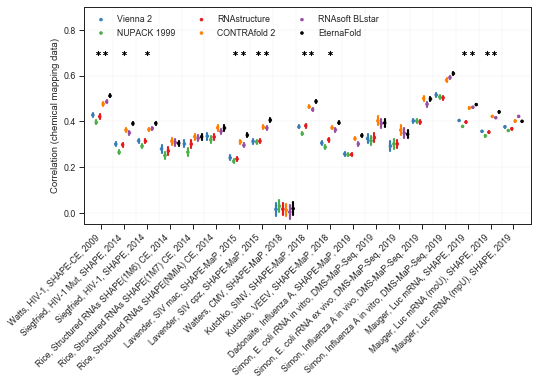

In [11]:
figure(figsize=(8,4))

titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]] #[[218/255,165/255,32/255]] # last is gold for eternafold

g = sns.pointplot(x='plot_name', y='Corr', data=corr300, hue='package', order=plot_order[:-1],
                      join=False, ci='sd', marker='.', scale=0.5, dodge=0.75, palette=standardized_palette)
ylabel('Correlation (chemical mapping data)')
legend(frameon=False,loc='upper left',ncol=3)
leg = g.get_legend()
for t, l in zip(leg.texts, titles): t.set_text(l)

for x in range(0,18,1):
    axvline(x+0.5,zorder=0,color='grey',linewidth=0.2,alpha=0.3)
    
for x in [0, 0.2, 0.4,0.6,0.8]:
    axhline(x, zorder=0,color='grey',linewidth=0.2,alpha=0.3)
ylim([-0.05,0.9])
xlim([-0.75, 18.75])
xlabel('')

pval_loc=0.7

for i,dataset in enumerate(pval_order):
    tmp = pval300.loc[pval300['dataset']==dataset]
    if tmp['eternafold_B'].values > 0.99:
        print(dataset)
        scatter([i-0.17,i+0.17], [pval_loc,pval_loc], marker=(6,2,0),linewidth=0.5, color='k')
    elif tmp['eternafold_B'].values >= 0.95:
        print(dataset, "*")
        scatter(i, pval_loc, marker=(6,2,0),linewidth=0.5, color='k')
xticks(rotation=45,horizontalalignment='right')

savefig('correlation_by_dataset_+eternafold_window300.pdf', bbox_inches='tight',transparent=True)


Lavender,2015 SIV cpz SHAPE(1M7) SSII-Mn(2+) Mut.
Kutchko,2018 SINV SHAPE(1M7) SSII-Mn(2+) Mut.
Mauger,2019 moU-nLUC mRNA


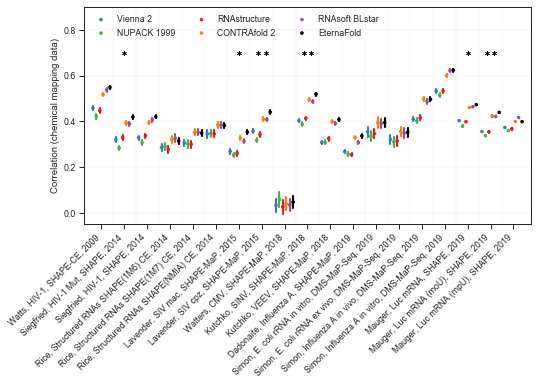

In [12]:
# WINDOW: 600

figure(figsize=(8,4))

titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]] #[[218/255,165/255,32/255]] # last is gold for eternafold

g = sns.pointplot(x='plot_name', y='Corr', data=corr600, hue='package', order=plot_order[:-1],
                      join=False, ci='sd', marker='.', scale=0.5, dodge=0.75, palette=standardized_palette)
ylabel('Correlation (chemical mapping data)')
legend(frameon=False,loc='upper left',ncol=3)
leg = g.get_legend()
for t, l in zip(leg.texts, titles): t.set_text(l)

for x in range(0,18,1):
    axvline(x+0.5,zorder=0,color='grey',linewidth=0.2,alpha=0.3)
    
for x in [0, 0.2, 0.4,0.6,0.8]:
    axhline(x, zorder=0,color='grey',linewidth=0.2,alpha=0.3)
ylim([-0.05,0.9])
xlim([-0.75, 18.75])
xlabel('')

pval_loc=0.7

for i,dataset in enumerate(pval_order):
    tmp = pval600.loc[pval600['dataset']==dataset]
    if tmp['eternafold_B'].values > 0.99:
        print(dataset)
        scatter([i-0.17,i+0.17], [pval_loc,pval_loc], marker=(6,2,0),linewidth=0.5, color='k')
    elif tmp['eternafold_B'].values >= 0.95:
        scatter(i, pval_loc, marker=(6,2,0),linewidth=0.5, color='k')
xticks(rotation=45,horizontalalignment='right')

savefig('correlation_by_dataset_+eternafold_window600.pdf', bbox_inches='tight',transparent=True)


Watts,2009 HIV-1 SHAPE(NMIA) SSIII CE
Siegfried,2014 HIV-1 SHAPE(1M7) SSII-Mn(2+) Mut. from Lavender
Lavender,2015 SIV mac SHAPE(1M7) SSII-Mn(2+) Mut.
Mauger,2019 moU-nLUC mRNA


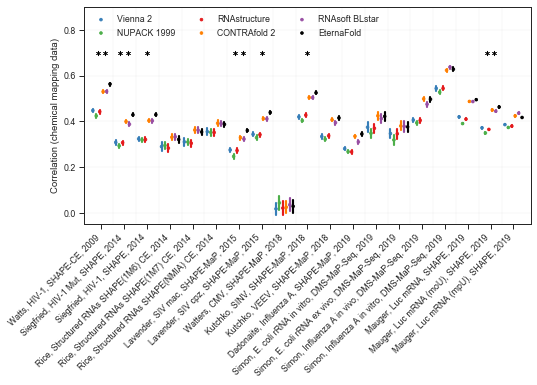

In [13]:
# WINDOW: 900

figure(figsize=(8,4))

titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]] #[[218/255,165/255,32/255]] # last is gold for eternafold

g = sns.pointplot(x='plot_name', y='Corr', data=corr900, hue='package', order=plot_order[:-1],
                      join=False, ci='sd', marker='.', scale=0.5, dodge=0.75, palette=standardized_palette)
ylabel('Correlation (chemical mapping data)')
legend(frameon=False,loc='upper left',ncol=3)
leg = g.get_legend()
for t, l in zip(leg.texts, titles): t.set_text(l)

for x in range(0,18,1):
    axvline(x+0.5,zorder=0,color='grey',linewidth=0.2,alpha=0.3)
    
for x in [0, 0.2, 0.4,0.6,0.8]:
    axhline(x, zorder=0,color='grey',linewidth=0.2,alpha=0.3)
ylim([-0.05,0.9])
xlim([-0.75, 18.75])
xlabel('')

pval_loc=0.7

for i,dataset in enumerate(pval_order):
    tmp = pval900.loc[pval900['dataset']==dataset]
    if tmp['eternafold_B'].values > 0.99:
        print(dataset)
        scatter([i-0.17,i+0.17], [pval_loc,pval_loc], marker=(6,2,0),linewidth=0.5, color='k')
    elif tmp['eternafold_B'].values >= 0.95:
        scatter(i, pval_loc, marker=(6,2,0),linewidth=0.5, color='k')

xticks(rotation=45,horizontalalignment='right')

savefig('correlation_by_dataset_+eternafold_window900.pdf', bbox_inches='tight',transparent=True)


In [16]:
results = corr300.groupby(['info','package'])['Corr'].agg({'mean','std'})
results = results[['mean','std']]
results.to_excel('../ExternalDatasets/_private/external_300window.xlsx')

In [14]:
results = corr600.groupby(['info','package'])['Corr'].agg({'mean','std'})
results = results[['mean','std']]
results['to_print'] = results.apply(lambda row: "%.3f ( %.3f)" % (row['mean'],row['std']), axis=1)
results.to_excel('../ExternalDatasets/_private/external_600window.xlsx')

In [20]:
print(np.mean(corr300['Corr']))
print(np.mean(corr600['Corr']))
print(np.mean(corr900['Corr']))

0.34969437851123986
0.3660848037755575
0.37419448044953746


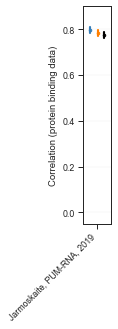

In [193]:
figure(figsize=(0.5,4))

pum_corr = pd.read_json('PUM_correlation_bootstraps.json')
pum_corr['plot_name'] = 'Jarmoskaite, PUM-RNA, 2019'

titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]] #[[218/255,165/255,32/255]] # last is gold for eternafold

g = sns.pointplot(x='plot_name', y='Corr', data=pum_corr, hue='package', hue_order=example_package_list,
                      join=False, ci='sd', marker='.', scale=0.5, dodge=0.5, palette=standardized_palette)
ylabel('Correlation (protein binding data)')
legend([], frameon=False)

for x in [0, 0.2, 0.4,0.6,0.8]:
    axhline(x, zorder=0,color='grey',linewidth=0.2,alpha=0.3)

xlabel('')
ylim([-0.05,0.9])

xticks(rotation=45,horizontalalignment='right')

savefig('protein_panel.pdf', bbox_inches='tight',transparent=True)



watts_2009_hiv_CE
siegfried_2014_hiv
siegfried_2014_hiv0
lavender_2015_sivmac
lavender_2015_sivcpz
watters_2018_cmv
dadonaite_2019_influenza
SINV
VEEV


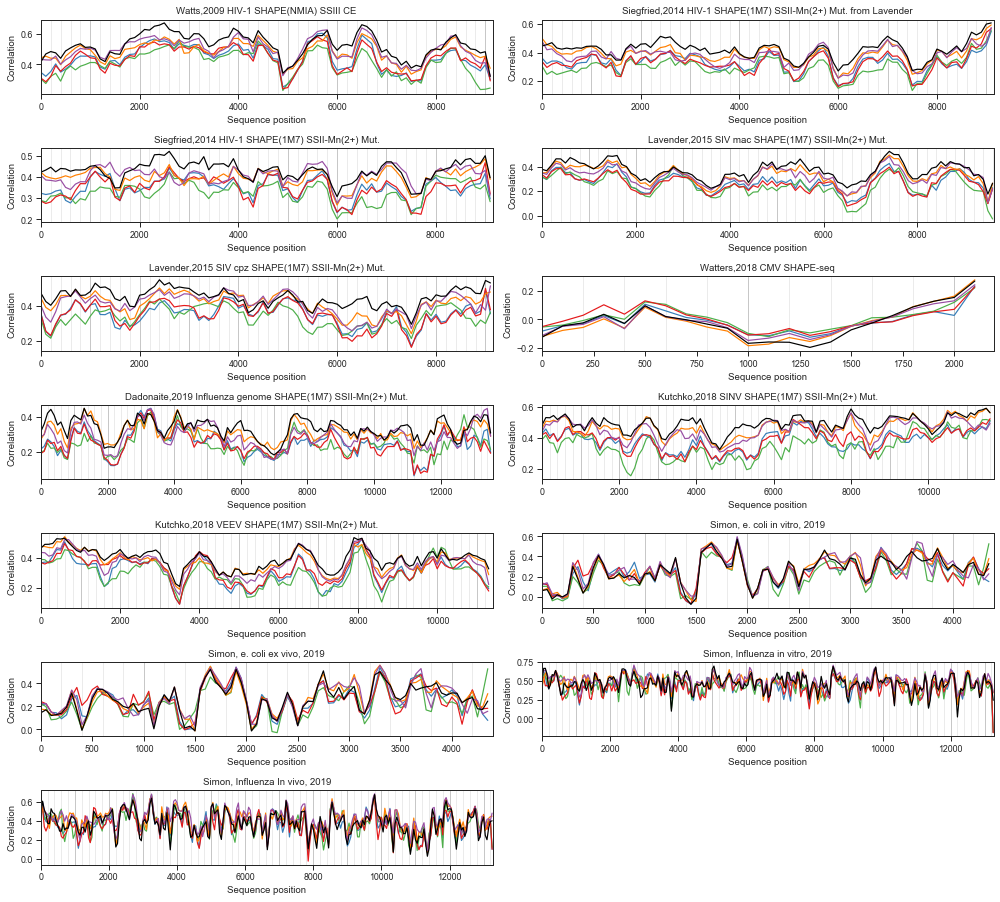

In [203]:
ctr=1
figure(figsize=(14,14))

data=data600

for identifier in data['ID'].unique():
    if '_L' not in identifier and 'rep2' not in identifier and 'Invivo' not in identifier and 'rice' not in identifier\
    and 'Invitro' not in identifier and '_exvivo' not in identifier and '_invitro' not in identifier:
        print(identifier)
        
        subplot(8,2,ctr)

        r=[]

        n_windows = len(data.loc[data['ID']==identifier])
        tmp_pal=sns.color_palette('Set1',5)
        standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]
        

        for i in range(n_windows):
            tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
            r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


        for j, pkg in enumerate(['vienna_2', 'nupack_99','rnastructure',
                                'contrafold_2','rnasoft_blstar','eternafold_B']):
            p_dat=[]
            xs, ys=[],[]
            for i in range(n_windows):

                tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
                p_dat.extend(np.clip(tmp,0,100)[:-25])

            for window_start in range(0,len(r),100):
                window_end = np.min([window_start+500,len(r)])
                xs.append(window_start)
                ys.append(np.corrcoef(r[window_start:window_end],
                                                  p_dat[window_start:window_end])[0][1])

            plot(xs,ys,c=standardized_palette[j],label=pkg)

        for x in range(0,len(r),200):
            axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

        for x in range(0,len(r),1000):
            axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

        xlabel('Sequence position')
        ylabel('Correlation')
        xlim([0,len(r)])
        #titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
        #legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
        title(data.loc[data['ID']==identifier]['info'].unique()[0])
        ctr+=1
        
subplot(8,2,ctr)

p_dat = {k:[] for k in packages}
r=[]
for identifier in data['ID'].unique():
    if '_invitro' in identifier:
        
        n_windows = len(data.loc[data['ID']==identifier])

        for i in range(n_windows):
            tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
            r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])

        for j, pkg in enumerate(packages):
            for i in range(n_windows):

                tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
                p_dat[pkg].extend(np.clip(tmp,0,100)[:-25])

for j, pkg in enumerate(packages):
    xs=[]
    ys=[]
    for window_start in range(0,len(r),50):
        window_end = np.min([window_start+100,len(r)])
        xs.append(window_start)
        ys.append(np.corrcoef(r[window_start:window_end],p_dat[pkg][window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
        
for x in range(0,len(r),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

for x in range(0,len(r),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

xlabel('Sequence position')
ylabel('Correlation')
titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
#legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
xlim([0,len(r)])
title('Simon, e. coli in vitro, 2019')

ctr+=1
subplot(8,2,ctr)

p_dat = {k:[] for k in packages}
r=[]
for identifier in data['ID'].unique():
    if '_exvivo' in identifier:
        
        n_windows = len(data.loc[data['ID']==identifier])

        for i in range(n_windows):
            tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
            r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])

        for j, pkg in enumerate(packages):
            for i in range(n_windows):

                tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
                p_dat[pkg].extend(np.clip(tmp,0,100)[:-25])

for j, pkg in enumerate(packages):
    xs=[]
    ys=[]
    for window_start in range(0,len(r),50):
        window_end = np.min([window_start+100,len(r)])
        xs.append(window_start)
        ys.append(np.corrcoef(r[window_start:window_end],p_dat[pkg][window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
        
for x in range(0,len(r),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

for x in range(0,len(r),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

xlabel('Sequence position')
ylabel('Correlation')
#legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
xlim([0,len(r)])
title('Simon, e. coli ex vivo, 2019')
ctr+=1
subplot(8,2,ctr)

p_dat = {k:[] for k in packages}
r=[]
for identifier in data['ID'].unique():
    if 'Invitro' in identifier:
        
        n_windows = len(data.loc[data['ID']==identifier])

        for i in range(n_windows):
            tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
            r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])

        for j, pkg in enumerate(packages):
            for i in range(n_windows):

                tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
                p_dat[pkg].extend(np.clip(tmp,0,100)[:-25])

for j, pkg in enumerate(packages):
    xs=[]
    ys=[]
    for window_start in range(0,len(r),50):
        window_end = np.min([window_start+100,len(r)])
        xs.append(window_start)
        ys.append(np.corrcoef(r[window_start:window_end],p_dat[pkg][window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
        
for x in range(0,len(r),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

for x in range(0,len(r),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

xlabel('Sequence position')
ylabel('Correlation')
titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
#legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
xlim([0,len(r)])
title('Simon, Influenza in vitro, 2019')

ctr+=1
subplot(8,2,ctr)

p_dat = {k:[] for k in packages}
r=[]
for identifier in data['ID'].unique():
    if 'Invivo' in identifier:
        
        n_windows = len(data.loc[data['ID']==identifier])

        for i in range(n_windows):
            tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
            r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])

        for j, pkg in enumerate(packages):
            for i in range(n_windows):

                tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
                p_dat[pkg].extend(np.clip(tmp,0,100)[:-25])

for j, pkg in enumerate(packages):
    xs=[]
    ys=[]
    for window_start in range(0,len(r),50):
        window_end = np.min([window_start+100,len(r)])
        xs.append(window_start)
        ys.append(np.corrcoef(r[window_start:window_end],p_dat[pkg][window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
        
for x in range(0,len(r),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

for x in range(0,len(r),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

xlabel('Sequence position')
ylabel('Correlation')
#legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
xlim([0,len(r)])
title('Simon, Influenza In vivo, 2019')


tight_layout()
savefig('all_correlation_profiles.pdf',bbox_inches='tight',transparent=True)


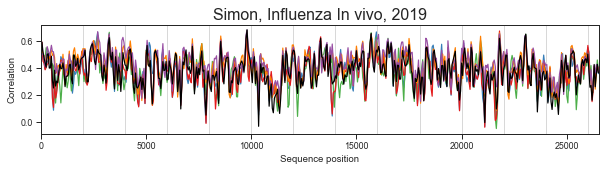

In [60]:
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]
figure(figsize=(20,))
packages=['vienna_2', 'nupack_99','rnastructure',
                            'contrafold_2','rnasoft_blstar','eternafold_B']

p_dat = {k:[] for k in packages}
r=[]
for identifier in data['ID'].unique():
    if 'Invivo' in identifier:
        
        n_windows = len(data.loc[data['ID']==identifier])

        for i in range(n_windows):
            tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
            r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])

        for j, pkg in enumerate(packages):
            for i in range(n_windows):

                tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
                p_dat[pkg].extend(np.clip(tmp,0,100)[:-25])

for j, pkg in enumerate(packages):
    xs=[]
    ys=[]
    for window_start in range(0,len(r),50):
        window_end = np.min([window_start+100,len(r)])
        xs.append(window_start)
        ys.append(np.corrcoef(r[window_start:window_end],p_dat[pkg][window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
        
for x in range(0,len(r),2000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

xlabel('Sequence position')
ylabel('Correlation')
titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
#legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
xlim([0,len(r)])
title('Simon, Influenza In vivo, 2019',fontsize=16)
savefig('simon_invivo.pdf',bbox_inches='tight',transparent=True)

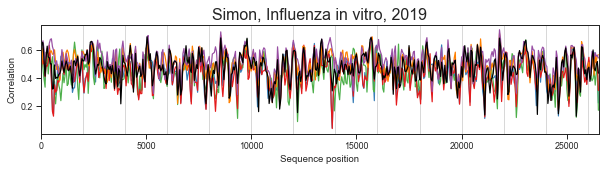

In [61]:
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]
figure(figsize=(10,2))
packages=['vienna_2', 'nupack_99','rnastructure',
                            'contrafold_2','rnasoft_blstar','eternafold_B']

p_dat = {k:[] for k in packages}
r=[]
for identifier in data['ID'].unique():
    if 'Invitro' in identifier:
        
        n_windows = len(data.loc[data['ID']==identifier])

        for i in range(n_windows):
            tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
            r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])

        for j, pkg in enumerate(packages):
            for i in range(n_windows):

                tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
                p_dat[pkg].extend(np.clip(tmp,0,100)[:-25])

for j, pkg in enumerate(packages):
    xs=[]
    ys=[]
    for window_start in range(0,len(r),50):
        window_end = np.min([window_start+100,len(r)])
        xs.append(window_start)
        ys.append(np.corrcoef(r[window_start:window_end],p_dat[pkg][window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
        
for x in range(0,len(r),2000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

xlabel('Sequence position')
ylabel('Correlation')
titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
#legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
xlim([0,len(r)])
title('Simon, Influenza in vitro, 2019',fontsize=16)
savefig('simon_invitro.pdf',bbox_inches='tight',transparent=True)

/Users/hwayment/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/hwayment/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/hwayment/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/hwayment/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/hwayment/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/hwayment/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[N

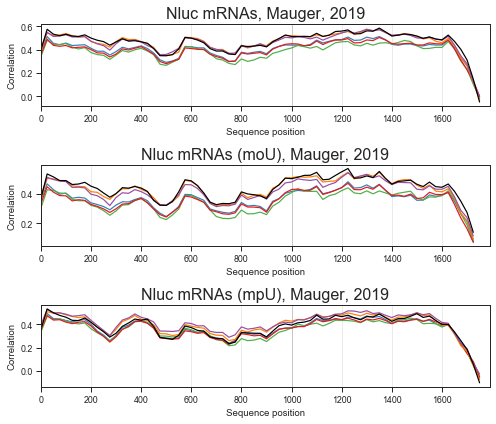

In [180]:
identifiers=['U_L7', 'U_L6', 'U_L4', 'U_L5', 'U_L1', 'U_L2', 'U_L3', 'U_L13', 'U_L12', 'U_L38', 'U_L10', 'U_L11',
 'U_L39', 'U_L15', 'U_L29', 'U_L28', 'U_L14', 'U_L16', 'U_L17', 'U_L32', 'U_L26', 'U_L27', 'U_L33',
 'U_L19', 'U_L25', 'U_L31', 'U_L30', 'U_L24', 'U_L18', 'U_L20', 'U_L34', 'U_L35', 'U_L21', 'U_L37',
 'U_L23', 'U_L22', 'U_L36', 'U_L8', 'U_L9']

data=data600
n_windows = len(data.loc[data['ID']=='U_L7'])
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]

figure(figsize=(7,6))
packages=['vienna_2', 'nupack_99','rnastructure',
                            'contrafold_2','rnasoft_blstar','eternafold_B']
all_data = {k:[] for k in packages}
for identifier in identifiers:
    r = []
    for i in range(n_windows):
        tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
        r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


    for j, pkg in enumerate(packages):
        p_dat=[]
        xs, ys=[],[]
        for i in range(n_windows):

            tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
            p_dat.extend(np.clip(tmp,0,100)[:-25])

        for window_start in range(0,len(r),25):
            window_end = np.min([window_start+100,len(r)])
            xs.append(window_start)
            ys.append(np.corrcoef(r[window_start:window_end],p_dat[window_start:window_end])[0][1])

        #plot(xs,ys,c=standardized_palette[j],label=pkg)
        all_data[pkg].append(ys)
        
subplot(3,1,1)        
for x in range(0,len(r),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

for x in range(0,len(r),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

for j,pkg in enumerate(packages):
    plot(xs,np.mean(np.array(all_data[pkg]),axis=0),color=standardized_palette[j],label=pkg)
    
xlabel('Sequence position')
ylabel('Correlation')
xlim([0,len(r)])
title('Nluc mRNAs, Mauger, 2019',fontsize=16)

all_data = {k:[] for k in packages}
for ind in identifiers:
    identifier='mo'+ind
    r = []
    for i in range(n_windows):
        tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
        r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


    for j, pkg in enumerate(packages):
        p_dat=[]
        xs, ys=[],[]
        for i in range(n_windows):

            tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
            p_dat.extend(np.clip(tmp,0,100)[:-25])

        for window_start in range(0,len(r),25):
            window_end = np.min([window_start+100,len(r)])
            xs.append(window_start)
            ys.append(np.corrcoef(r[window_start:window_end],p_dat[window_start:window_end])[0][1])

        #plot(xs,ys,c=standardized_palette[j],label=pkg)
        all_data[pkg].append(ys)

subplot(3,1,2)
   
for x in range(0,len(r),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

for x in range(0,len(r),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

for j,pkg in enumerate(packages):
    plot(xs,np.mean(np.array(all_data[pkg]),axis=0),color=standardized_palette[j],label=pkg)
    
xlabel('Sequence position')
ylabel('Correlation')
xlim([0,len(r)])
title('Nluc mRNAs (moU), Mauger, 2019',fontsize=16)

all_data = {k:[] for k in packages}
for ind in identifiers:
    identifier='mp'+ind
    r = []
    for i in range(n_windows):
        tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
        r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


    for j, pkg in enumerate(packages):
        p_dat=[]
        xs, ys=[],[]
        for i in range(n_windows):

            tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
            p_dat.extend(np.clip(tmp,0,100)[:-25])

        for window_start in range(0,len(r),25):
            window_end = np.min([window_start+100,len(r)])
            xs.append(window_start)
            ys.append(np.corrcoef(r[window_start:window_end],p_dat[window_start:window_end])[0][1])

        #plot(xs,ys,c=standardized_palette[j],label=pkg)
        all_data[pkg].append(ys)
        
subplot(3,1,3)    
for x in range(0,len(r),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

for x in range(0,len(r),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

for j,pkg in enumerate(packages):
    plot(xs,np.mean(np.array(all_data[pkg]),axis=0),color=standardized_palette[j],label=pkg)
    
xlabel('Sequence position')
ylabel('Correlation')
xlim([0,len(r)])
title('Nluc mRNAs (mpU), Mauger, 2019',fontsize=16)
tight_layout()
savefig('nluc_correlation_along_length.pdf',bbox_inches='tight',transparent=True)


/Users/hwayment/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/hwayment/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


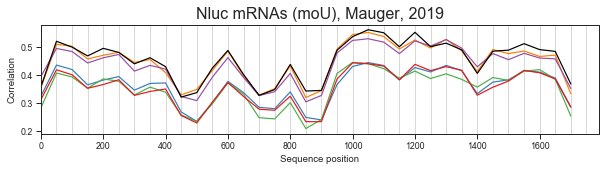

In [54]:
dat=[]

identifier='watts_2009_hiv_CE'

n_windows = len(prob_dat.loc[prob_dat['ID']==identifier])
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]

figure(figsize=(10,2))
for i in range(n_windows):
    tmp = prob_dat.loc[prob_dat['ID']==identifier]['reactivity'].iloc[i]
    dat.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


for j, pkg in enumerate(['vienna_2', 'nupack_99','rnastructure',
                        'contrafold_2','rnasoft_blstar','eternafold_B']):
    p_dat=[]
    xs, ys=[],[]
    for i in range(n_windows):
        
        tmp = prob_dat.loc[prob_dat['ID']==identifier]['p_%s' % pkg].iloc[i]
        p_dat.extend(np.clip(tmp,0,100)[:-25])
        
    for window_start in range(0,len(dat),100):
        window_end = np.min([window_start+500,len(dat)])
        xs.append(window_start)
        ys.append(np.corrcoef(dat[window_start:window_end],
                                          p_dat[window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
    
for x in range(0,len(dat),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)
    
for x in range(0,len(dat),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)
    
xlabel('Sequence position')
ylabel('Correlation')
xlim([0,len(dat)])
titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
title('Watts, HIV-1, 2009',fontsize=16)
savefig('Watts_HIV1_correlation_profile.pdf',bbox_inches='tight',transparent=True)


In [198]:
def plot_correlation_profile(data, identifier,corr_window_size=500):
    dat=[]

    n_windows = len(data.loc[data['ID']==identifier])
    print(n_windows)
    tmp_pal=sns.color_palette('Set1',5)
    standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]

    for i in range(n_windows):
        tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
        dat.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


    for j, pkg in enumerate(['vienna_2', 'nupack_99','rnastructure',
                            'contrafold_2','rnasoft_blstar','eternafold_B']):
        p_dat=[]
        xs, ys=[],[]
        for i in range(n_windows):

            tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
            p_dat.extend(np.clip(tmp,0,100)[:-25])

        for window_start in range(0,len(dat),100):
            window_end = np.min([window_start+500,len(dat)])
            xs.append(window_start)
            ys.append(np.corrcoef(dat[window_start:window_end],
                                              p_dat[window_start:window_end])[0][1])

        plot(xs,ys,c=standardized_palette[j],label=pkg)

    for x in range(0,len(dat),200):
        axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

    for x in range(0,len(dat),1000):
        axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

    xlabel('Sequence position')
    ylabel('Correlation')
    xlim([0,len(dat)])
    ylim([0,0.8])
    titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
    legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))


43


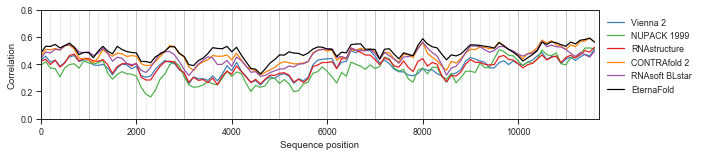

In [174]:
plot_correlation_profile(data600,'SINV')
savefig('../assets/SINV_profile.pdf',bbox_inches='tight',transparent=True)

42


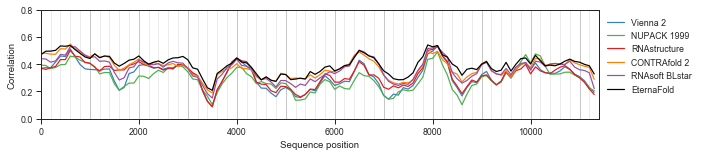

In [175]:
plot_correlation_profile(data600,'VEEV')
savefig('../assets/VEEV_profile.pdf',bbox_inches='tight',transparent=True)

34


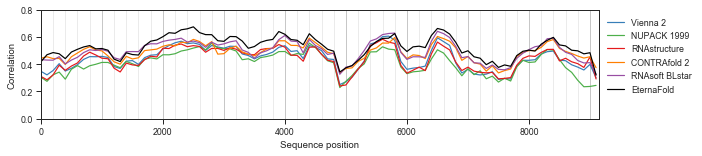

In [176]:
plot_correlation_profile(data600,'watts_2009_hiv_CE')
savefig('../assets/hiv_profile.pdf',bbox_inches='tight',transparent=True)

In [22]:
full_concat_data = pd.DataFrame()
for dataset in data600['info'].unique():
    
    print('Analyzing %s' % dataset)
    tmp_data = data600.loc[data600['info']==dataset]
    tmp_concat_data = utils.write_concatenated_dataframe(tmp_data)
    
    # filter reactivity outliers
    tmp_concat_data = utils.filter_data(tmp_concat_data)
    # remove nucleotides preceded by 6 (or more) A's
    tmp_concat_data = tmp_concat_data.loc[tmp_concat_data['in_polyA']==0]
    tmp_concat_data['dataset'] = dataset
    full_concat_data = full_concat_data.append(tmp_concat_data, ignore_index=True)

Analyzing Mauger,2019 nLUC mRNA


../ChemMapping/scripts/RDAT_utils.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trimmed_sequence'] = df.apply(lambda row: [list(row['sequence'])[x] for x in row['seqpos'] if x < len(row['sequence'])], axis=1)
../ChemMapping/scripts/RDAT_utils.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_polyA'] = df.apply(lambda row: get_polyA_indicator(row, polyA_len=6), axis=1)
../ChemMapping/scripts/RDAT_utils.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

n_constructs 156
14901 of 73710 nucleotides removed, 0.20, cutoff = 1.44
Analyzing Mauger,2019 mpU-nLUC mRNA
n_constructs 156
14994 of 73710 nucleotides removed, 0.20, cutoff = 1.52
Analyzing Mauger,2019 moU-nLUC mRNA
n_constructs 156
12469 of 73710 nucleotides removed, 0.17, cutoff = 1.41
Analyzing Watts,2009 HIV-1 SHAPE(NMIA) SSIII CE
n_constructs 16
902 of 9546 nucleotides removed, 0.09, cutoff = 1.01
Analyzing Siegfried,2014 HIV-1 SHAPE(1M7) SSII-Mn(2+) Mut. from Lavender
n_constructs 16
1107 of 9548 nucleotides removed, 0.12, cutoff = 1.52
Analyzing Siegfried,2014 HIV-1 SHAPE(1M7) SSII-Mn(2+) Mut.
n_constructs 16
1487 of 9548 nucleotides removed, 0.16, cutoff = 1.63
Analyzing Lavender,2015 SIV mac SHAPE(1M7) SSII-Mn(2+) Mut.
n_constructs 17
2115 of 10047 nucleotides removed, 0.21, cutoff = 1.75
Analyzing Lavender,2015 SIV cpz SHAPE(1M7) SSII-Mn(2+) Mut.
n_constructs 16
1425 of 9542 nucleotides removed, 0.15, cutoff = 1.58
Analyzing Watters,2018 CMV SHAPE-seq
n_constructs 4
1015 of

In [23]:
import EB_stats
pval_package_list=['nupack_99', 'vienna_2', 'rnastructure', 'rnasoft_blstar', 'contrafold_2' , 'eternafold_B']

arr = EB_stats.bootstrap_all_datasets(full_concat_data, x_data='reactivity', y_data='p', package_list= pval_package_list, n_bootstraps=1000)

In [27]:
per_dataset_tests = EB_stats.sig_over_individual_datasets(full_concat_data, x_data='reactivity', y_data='p', package_list= pval_package_list, n_bootstraps=1000)

Mauger,2019 nLUC mRNA
Mauger,2019 mpU-nLUC mRNA
Mauger,2019 moU-nLUC mRNA
Watts,2009 HIV-1 SHAPE(NMIA) SSIII CE
Siegfried,2014 HIV-1 SHAPE(1M7) SSII-Mn(2+) Mut. from Lavender
Siegfried,2014 HIV-1 SHAPE(1M7) SSII-Mn(2+) Mut.
Lavender,2015 SIV mac SHAPE(1M7) SSII-Mn(2+) Mut.
Lavender,2015 SIV cpz SHAPE(1M7) SSII-Mn(2+) Mut.
Watters,2018 CMV SHAPE-seq
Dadonaite,2019 Influenza genome SHAPE(1M7) SSII-Mn(2+) Mut.
Rice,2014 structured RNAs SHAPE(1M6) CE
Rice,2014 structured RNAs SHAPE(1M7) CE
Rice,2014 structured RNAs SHAPE(NMIA) CE
Kutchko,2018 SINV SHAPE(1M7) SSII-Mn(2+) Mut.
Kutchko,2018 VEEV SHAPE(1M7) SSII-Mn(2+) Mut.
Simon,2019 Ecoli invitro
Simon,2019 Ecoli exvivo
Simon,2019 Influenza invivo
Simon,2019 Influenza invitro


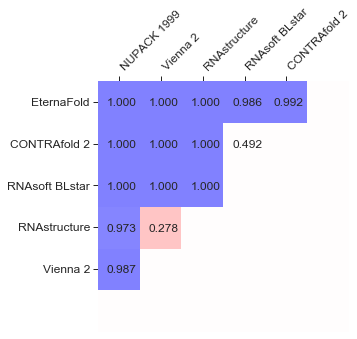

In [26]:
reordered_titles=  ['NUPACK 1999', 'Vienna 2', 'RNAstructure', 'RNAsoft BLstar', 'CONTRAfold 2',  'EternaFold']

fig = EB_stats.plot_net_overview(arr, package_list=packages, titles=reordered_titles, fontsize=12, figsize=(5,5))
fig.savefig('net_pvalues_correlation_maintext.pdf',bbox_inches='tight',transparent=True)

<Figure size 1440x2160 with 0 Axes>

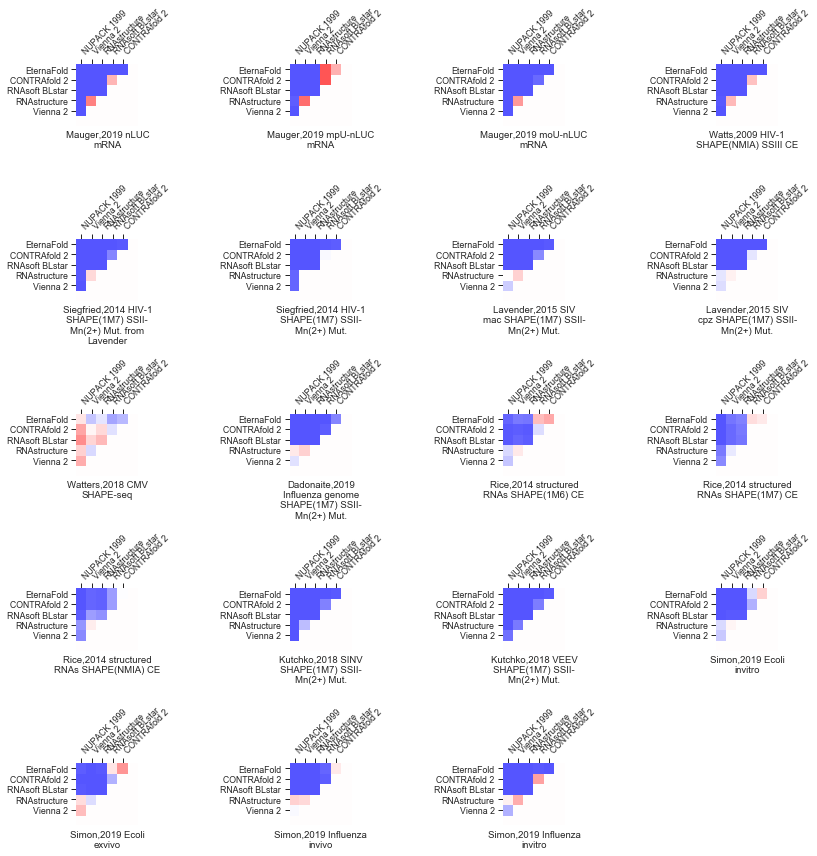

In [326]:
figure(figsize=(20,30))

fig = EB_stats.plot_pairwise_matrices(test_dir, n_rows=5, n_cols=4, 
        package_list = packages, titles = reordered_titles, labels=False, figsize=(12,12))

fig.savefig('pairwise_matrices_per_dataset_external.pdf',bbox_inches='tight',transparent=True)